In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
import random
import csv
from collections import defaultdict
from math import e
from math import pi
import requests
import re

In [2]:
#loading features of the pigeons(curb) dataset
feature1= pd.read_csv('Pigeons_8234_1280_720_DataH10.csv', header=None)
feature2= pd.read_csv('Pigeons_8234_1280_720_DataHOG.csv', header=None)
feature3= pd.read_csv('Pigeons_8234_1280_720_DataLBP.csv', header=None)
feature4= pd.read_csv('Pigeons_8234_1280_720_DataRGB.csv', header= None)

In [6]:
feature1.describe()

,0,1,2,3,4,5,6,7,8,9
count,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000
mean,0.214853,0.122944,0.004473,0.002458,0.012004,0.100064,0.300899,0.113432,0.036797,0.092076
std,0.185527,0.091481,0.006333,0.003109,0.016432,0.102930,0.155713,0.074799,0.022308,0.075925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080676,0.056601,0.000957,0.000319,0.001276,0.027742,0.175064,0.058673,0.020408,0.043048
50%,0.153061,0.111926,0.002551,0.001594,0.005102,0.070153,0.305166,0.101084,0.032526,0.073980
75%,0.287787,0.171237,0.005102,0.003189,0.016582,0.133610,0.403380,0.156250,0.048469,0.113202
max,1.000000,1.000000,0.100765,0.036671,0.139349,0.581633,0.869260,0.542730,0.163584,1.000000


In [5]:
feature2.describe()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
count,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,...,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000
mean,0.362936,0.255663,0.259320,0.282088,0.412249,0.310968,0.266247,0.245112,0.248306,0.364599,...,0.248740,0.367445,0.228930,0.242909,0.281895,0.415325,0.300835,0.257693,0.248019,0.251077
std,0.119069,0.157932,0.152350,0.152988,0.116714,0.164662,0.152082,0.148942,0.158364,0.118006,...,0.165526,0.125061,0.160800,0.160093,0.164742,0.126445,0.174591,0.154682,0.161138,0.171956
min,0.000000,0.000000,0.000000,0.000000,0.015413,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007520,0.000000,0.000000,0.000000,0.000000
25%,0.343444,0.110780,0.122835,0.151438,0.363841,0.178931,0.123542,0.105961,0.096890,0.345923,...,0.094755,0.336571,0.075983,0.089412,0.136609,0.367929,0.150606,0.113583,0.098171,0.089927
50%,0.379281,0.284180,0.285565,0.331793,0.396958,0.353797,0.320477,0.279084,0.278041,0.381915,...,0.260075,0.386671,0.225472,0.254623,0.335288,0.405710,0.350586,0.285745,0.261732,0.265263
75%,0.418518,0.380404,0.379122,0.392874,0.452139,0.410918,0.382367,0.373528,0.376530,0.426135,...,0.377793,0.430790,0.373412,0.381734,0.402987,0.463006,0.413158,0.386306,0.384401,0.387819
max,0.973724,0.697657,0.863678,0.696004,1.000000,0.706978,0.655117,0.603675,0.699652,0.828692,...,0.707107,0.972188,0.743850,0.698653,0.705574,1.000000,0.812851,0.856274,0.776407,0.736420


In [4]:
feature3.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,...,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000
mean,0.297233,0.038514,0.014252,0.024746,0.003525,0.009148,0.029422,0.001072,0.000109,0.003847,...,0.003819,0.000115,0.001535,0.034713,0.007605,0.003133,0.024683,0.012055,0.038658,0.263319
std,0.042936,0.010388,0.004536,0.006422,0.001502,0.002940,0.007191,0.000697,0.000194,0.001524,...,0.001484,0.000193,0.000873,0.008340,0.002535,0.001337,0.009214,0.004129,0.017063,0.036233
min,0.108099,0.009566,0.001594,0.006059,0.000000,0.000319,0.011161,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008291,0.000319,0.000000,0.000638,0.000319,0.000638,0.125319
25%,0.270886,0.031250,0.011161,0.020408,0.002551,0.007015,0.024872,0.000638,0.000000,0.002870,...,0.002870,0.000000,0.000957,0.029018,0.005740,0.002232,0.018814,0.009247,0.028061,0.240115
50%,0.292730,0.037946,0.013712,0.023916,0.003508,0.008929,0.028699,0.000957,0.000000,0.003827,...,0.003827,0.000000,0.001594,0.034120,0.007653,0.003189,0.023916,0.011798,0.036033,0.264031
75%,0.317921,0.044643,0.016901,0.028061,0.004464,0.010842,0.033163,0.001594,0.000319,0.004783,...,0.004783,0.000319,0.001913,0.039860,0.009247,0.003827,0.029337,0.014668,0.047194,0.287628
max,0.548469,0.120855,0.036990,0.072066,0.011161,0.025510,0.079401,0.005102,0.001913,0.011161,...,0.009885,0.001913,0.005421,0.073023,0.019452,0.011480,0.100128,0.028380,0.182717,0.481824


In [3]:
feature4.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,...,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000,4559.000000
mean,0.001642,0.001608,0.001611,0.000481,0.000497,0.000501,0.001684,0.001667,0.001699,0.000525,...,0.001703,0.000499,0.000523,0.000537,0.001790,0.001767,0.001808,0.000475,0.000491,0.000500
std,0.000512,0.000535,0.000558,0.000212,0.000224,0.000229,0.000508,0.000553,0.000603,0.000192,...,0.000545,0.000194,0.000206,0.000205,0.000646,0.000651,0.000636,0.000193,0.000202,0.000204
min,0.000440,0.000383,0.000401,0.000028,0.000028,0.000033,0.000362,0.000307,0.000296,0.000037,...,0.000466,0.000039,0.000035,0.000034,0.000470,0.000467,0.000483,0.000027,0.000023,0.000025
25%,0.001303,0.001264,0.001214,0.000334,0.000345,0.000341,0.001382,0.001336,0.001279,0.000383,...,0.001277,0.000363,0.000375,0.000396,0.001270,0.001251,0.001304,0.000331,0.000334,0.000343
50%,0.001596,0.001523,0.001511,0.000477,0.000491,0.000495,0.001625,0.001547,0.001575,0.000518,...,0.001639,0.000484,0.000512,0.000532,0.001719,0.001667,0.001715,0.000469,0.000486,0.000498
75%,0.001976,0.001946,0.001944,0.000611,0.000628,0.000635,0.001960,0.001963,0.002045,0.000657,...,0.002105,0.000633,0.000663,0.000669,0.002262,0.002246,0.002278,0.000607,0.000629,0.000643
max,0.003298,0.003434,0.003613,0.001285,0.001417,0.001400,0.003312,0.003534,0.003596,0.001370,...,0.003507,0.001297,0.001340,0.001330,0.003595,0.003584,0.003562,0.001406,0.001435,0.001425


Assuming normalization has been done during preprocessing since there is no wild observable difference in magnitude between column values

In [7]:
#load target variable file
pigeons_label= pd.read_csv('Pigeons_8234_1280_720_Labels.csv', header=None)

## 1. Implementing a Prior classifier without using a Python library 

In [54]:
class NaiveBayesClassifier:
    
    def __init__(self):
        self.class_priors = None
        self.conditional_probs = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Compute class priors
        self.class_priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / n_samples
        
        # Compute conditional probabilities
        self.conditional_probs = {}
        for i in range(n_features):
            feature_values = np.unique(X[:, i])
            for j, c in enumerate(self.classes):
                class_data = X[y == c, :]
                self.conditional_probs[(i, c)] = {}
                for value in feature_values:
                    self.conditional_probs[(i, c)][value] = (np.sum(class_data[:, i] == value) + 1) / (len(class_data) + len(feature_values))
    
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)
        for i in range(n_samples):
            joint_probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                # Compute the joint probability of the features and the class
                joint_prob = np.log(self.class_priors[j])
                for k in range(X.shape[1]):
                    if (k, c) in self.conditional_probs:
                        if X[i, k] in self.conditional_probs[(k, c)]:
                            joint_prob += np.log(self.conditional_probs[(k, c)][X[i, k]])
                        else:
                            # Handle unseen feature values by assigning a small probability
                            joint_prob += np.log(1 / (len(self.conditional_probs[(k, c)]) + 1))
                    else:
                        # Handle unseen features by assigning a small probability
                        joint_prob += np.log(1 / (X[:, k].max() + 1))
                joint_probs[j] = joint_prob
            # Assign the class with the highest joint probability as the predicted class
            y_pred[i] = self.classes[np.argmax(joint_probs)]
        return y_pred
    
#This code defines a Naive Bayes classifier(because it makes a new observation to the class with the highest prior probability) without a python library.
#The NaiveBayesClassifier class has three main components: class_priors, conditional_probs, and classes.
#The class_priors attribute stores the prior probability of each class in the training data.
#The conditional_probs attribute stores the conditional probability of each feature value given a class.
#The classes attribute stores the unique classes in the training data.
#The fit method fits the Naive Bayes model to the training data X and class labels y by computing the class priors and conditional probabilities.
#The predict method predicts the class labels for new data X using the fitted model.

In [9]:
#creating a dataset containing target and feature variables
pigeons_dataset= pd.concat([feature1, feature2, feature3, feature4, pigeons_label],axis=1)
pigeons_dataset.shape

(4559, 556)

In [11]:
pigeons_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,0
0,0.792411,0.099171,0.000000,0.000000,0.000319,0.000638,0.042730,0.005421,0.005102,0.054209,...,0.000231,0.000235,0.000231,0.001817,0.001592,0.001543,0.000470,0.000507,0.000496,6
1,0.415816,0.281250,0.010842,0.002870,0.005421,0.022640,0.084503,0.034758,0.015306,0.126594,...,0.000512,0.000675,0.000703,0.002874,0.002865,0.002825,0.000227,0.000240,0.000244,11
2,0.321110,0.222577,0.005421,0.002870,0.006059,0.005421,0.251276,0.105230,0.018495,0.061543,...,0.000360,0.000347,0.000375,0.001857,0.001734,0.001717,0.000500,0.000456,0.000421,9
3,0.353954,0.112883,0.001276,0.000000,0.007653,0.063776,0.211097,0.069196,0.030293,0.149872,...,0.000323,0.000335,0.000428,0.001270,0.001278,0.001398,0.000578,0.000608,0.000709,8
4,0.205676,0.035077,0.002870,0.000638,0.009885,0.031569,0.316645,0.145089,0.044643,0.207908,...,0.000757,0.000554,0.000589,0.002592,0.002527,0.002485,0.000860,0.000906,0.000939,1


In [21]:
#splitting pigeons dataset into training and testing data according to sizes given: 2268 2291
data_train= pigeons_dataset.iloc[:2268, :]  #2268 rows, all columns
data_test=  pigeons_dataset.iloc[:2291, :]  #2291 rows, all columns

In [55]:
#creating training data for features
#converting to numpy as NB without python lirary cannot directly compute both dataframe and numpy array 
x= data_train.iloc[:,:-1].to_numpy()  #iloc selects all rows from the train dataset and all columns except the last column
x.shape

(2268, 555)

In [18]:
#creating testing data for features 
x_test= data_test.iloc[:, :-1].to_numpy()   #iloc selects all rows from the test dataset and all columns except the last column
x_test.shape

(2291, 555)

In [19]:
#creating training data for target variable
y = data_train.iloc[:,-1]     #iloc selects all rows from the train dataset and only the last column
y.shape

(2268,)

In [20]:
#creating testing data for target variable
y_test= data_test.iloc[:, -1].to_numpy()  #iloc selects all rows from the test dataset and only the last column
y_test.shape

(2291,)

In [22]:
#creating naive bayes object
nb =NaiveBayesClassifier()

In [23]:
# Train the classifier on the dataset
nb.fit(x, y)

In [24]:
# Make predictions on the same dataset
y_pred = nb.predict(x_test)

In [25]:
# Compute the accuracy of the classifier
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.99257965953732


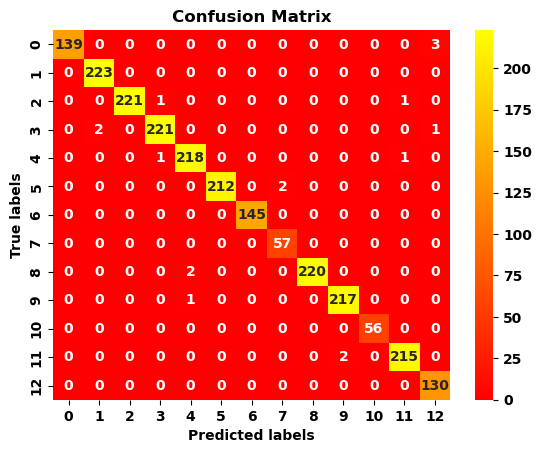

In [30]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap= 'autumn')   #annot= writes the number of times it predicts correctly/wrong
                                                        #fmt= converts to whole integer
                                                        #cmap= specifies colours 
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("nb_pigeons(curb)_confusion_matrix.png")
plt.show()

In [31]:
#concatenating all features 
pigeons_features = pd.concat([feature1, feature2, feature3, feature4],axis=1)

In [32]:
#converting to numpy array because sklearn expects target variable to be in numpy array
pigeons_labels= pigeons_label.to_numpy()

In [33]:
#spliting dataframe into given training and testing sizes: 2268	2291
training=  2268
testing=  2291
test_size = testing / (training + testing)
test_size 

0.502522483000658

In [35]:
#train test split
# X is the input features and y is the target variable
X_train, X_test, Y_train, Y_test = train_test_split(pigeons_features, pigeons_labels, test_size=test_size, random_state=42)

# test_size specifies the proportion of the dataset to include in the test split
# random_state ensures that the same random split is generated each time the code is run

In [36]:
print(X_train.shape, Y_train.shape)

(2268, 555) (2268, 1)


In [38]:
print(X_test.shape, Y_test.shape)

(2291, 555) (2291, 1)


## 2. Bagging Classifier

In [39]:
# create the base classifier
base_classifier = DecisionTreeClassifier()

# create the ensemble classifier using bagging
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, 
                                        n_estimators=10, 
                                        random_state=42)

# fit the model on training data
bagging_classifier.fit(X_train, Y_train)

# predict the class labels for test data
bagging_pred = bagging_classifier.predict(X_test)

# evaluate the performance of the classifier
bagging_acc= accuracy_score(Y_test, bagging_pred)
print("Bagging Accuracy: {:.2f}".format(bagging_acc))

Bagging Accuracy: 0.85


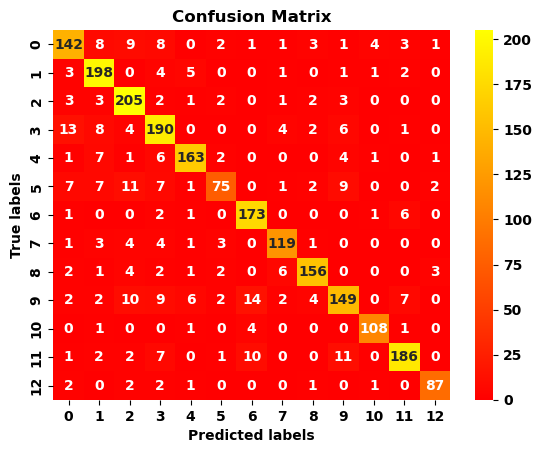

In [40]:
# Create a confusion matrix
cm_bag = confusion_matrix(Y_test, bagging_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_bag, annot=True, fmt='g', cmap='autumn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("bagging_pigeons(curb)_confusion_matrix.png")
plt.show()

## 3. Linear Discriminant Analysis Classifier

In [41]:
# Create an instance of the LDA model
LDA = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
LDA.fit(X_train, Y_train)

# Predict the target values for the testing data
LDA_pred = LDA.predict(X_test)

#evaluate the performance of the classifier
LDA_acc = accuracy_score(Y_test, LDA_pred)
print("LDA Accuracy: {:.2f}".format(LDA_acc))

LDA Accuracy: 0.92


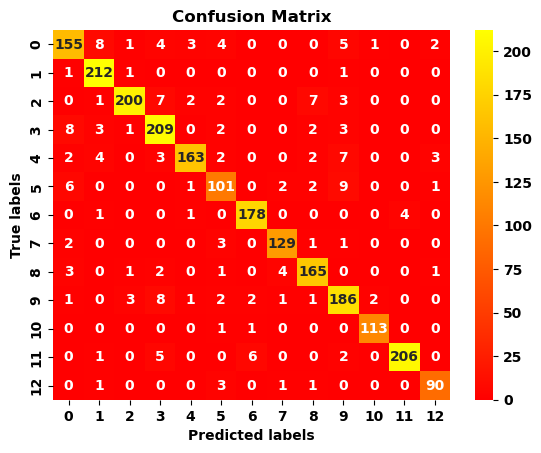

In [42]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, LDA_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='autumn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("LDA_pigeons(curb)_confusion_matrix.png")

plt.show()

## 4. KNeighbors Classifier

In [43]:
# Create an instance of the KNN model with k=5
KNN = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
KNN.fit(X_train, Y_train)

# Predict the target values for the testing data
KNN_pred = KNN.predict(X_test)

#evaluate the performance of the classifier
KNN_acc = accuracy_score(Y_test, KNN_pred)
print("KNN Accuracy: {:.2f}".format(KNN_acc))

KNN Accuracy: 0.88


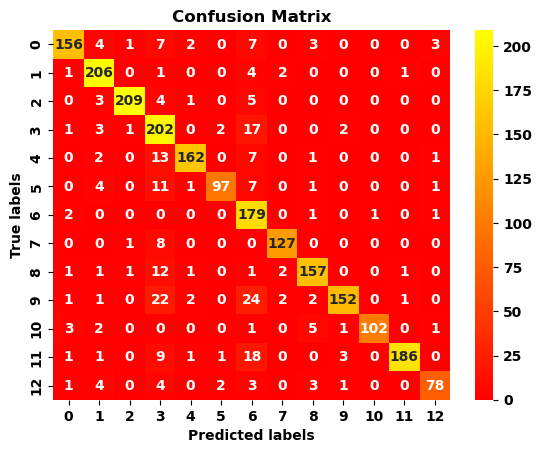

In [44]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, KNN_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='autumn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("KNN_pigeons(curb)_confusion_matrix.png")
plt.show()

## 5. Decision Tree Classifier

In [45]:
# Create an instance of the Decision Tree model with max depth of 30
Tree = DecisionTreeClassifier(max_depth=30)

# Fit the Decision Tree model to the training data
Tree.fit(X_train, Y_train)

# Predict the target values for the testing data
Tree_pred = Tree.predict(X_test)

#evaluate the performance of the classifier
Tree_acc = accuracy_score(Y_test, Tree_pred)
print("Decision Tree Accuracy: {:.2f}".format(Tree_acc))

Decision Tree Accuracy: 0.73


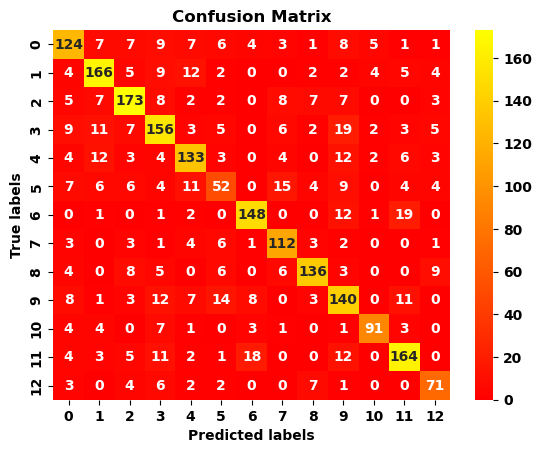

In [46]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, Tree_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='autumn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("Tree_pigeons(curb)_confusion_matrix.png")
plt.show()

## 6. Random Forest Classifier

In [47]:
# Create an instance of the Random Forest model with 100 trees
RFC = RandomForestClassifier()

# Fit the Random Forest model to the training data
RFC.fit(X_train, Y_train)

# Predict the target values for the testing data
RFC_pred = RFC.predict(X_test)

#evaluate the performance of the classifier
RFC_acc = accuracy_score(Y_test, RFC_pred)
print("Random Forest Accuracy: {:.2f}".format(RFC_acc))

Random Forest Accuracy: 0.93


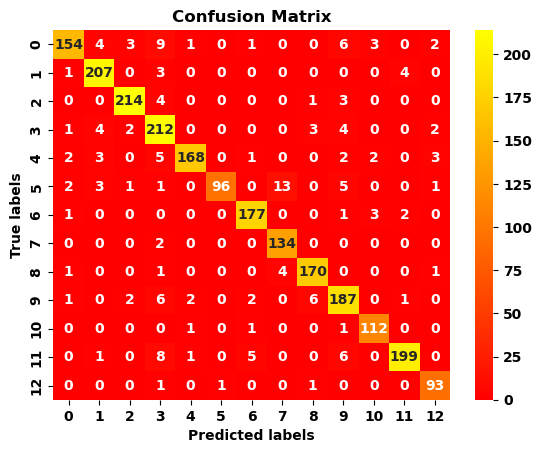

In [48]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, RFC_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='autumn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("rfc_pigeons(curb)_confusion_matrix.png")
plt.show()

## 7. SVM model

In [49]:
# Create an instance of the SVM model
svm = SVC(kernel='linear', C=1)

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

# Predict the target values for the testing data
svm_pred = svm.predict(X_test)

#evaluate the performance of the classifier
svm_acc = accuracy_score(Y_test, svm_pred)
print("SVM Accuracy: {:.2f}".format(svm_acc))

SVM Accuracy: 0.86


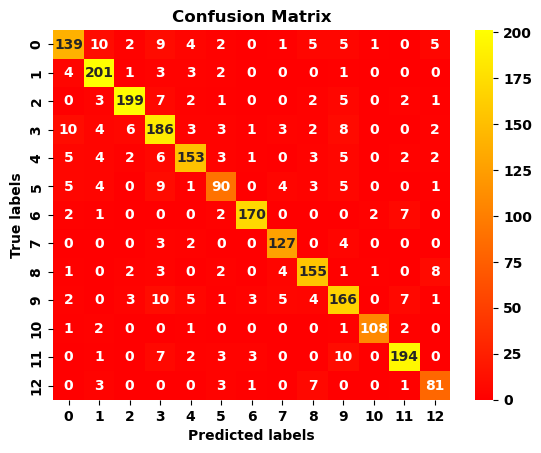

In [50]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, svm_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='autumn')  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig("svm_pigeons(curb)_confusion_matrix.png")
plt.show()

In [51]:
# Create a dictionary of the accuracy scores
results = {'Classifier': ['Largest prior', 'Decision Tree', 'KNN', 'Bagging', 'SVM', 'LDA', 'Random Forest'],
           'Accuracy': [accuracy, Tree_acc, KNN_acc, bagging_acc, svm_acc, LDA_acc, RFC_acc]}

# Create a Pandas dataframe from the dictionary
df_pigeons_curb_results = pd.DataFrame(results)

# Sort the dataframe by accuracy in descending order
df_pigeons_curb_results = df_pigeons_curb_results.sort_values(by='Accuracy', ascending=False)

# Print the dataframe
df_pigeons_curb_results

,Classifier,Accuracy
0,Largest prior,0.992580
6,Random Forest,0.926670
5,LDA,0.919686
2,KNN,0.878656
4,SVM,0.859450
3,Bagging,0.851593
1,Decision Tree,0.727193


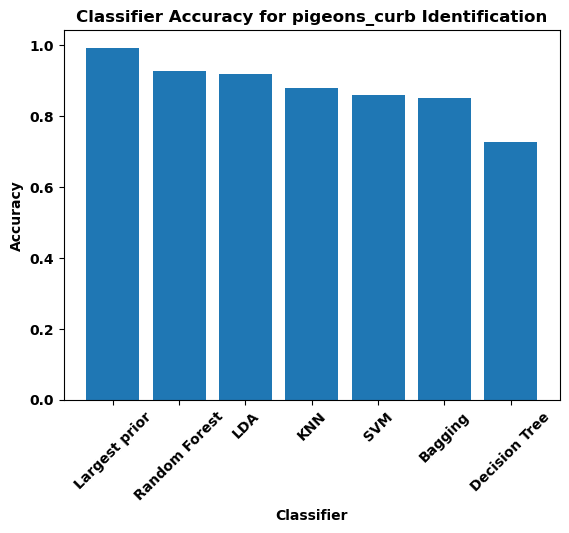

In [53]:
# Create a bar chart of the accuracy scores
plt.bar(df_pigeons_curb_results['Classifier'], df_pigeons_curb_results['Accuracy'])
plt.xticks(rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy for pigeons_curb Identification')

plt.savefig("barchart showing pigeons_curb Classifier Accuracy.png")
plt.show()